In [7]:
import pandas as pd;
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [8]:
TRAINING_DIR = "./data/train"
VALIDATION_DIR = "./data/valid"

training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, rotation_range = 30, height_shift_range = 0.2, fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size = (244, 244), class_mode = 'categorical', batch_size = 64)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size = (244, 244), class_mode = 'categorical', batch_size = 64)

Found 6166 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [9]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides = (4, 4), activation= 'relu', input_shape= (244, 244, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    tf.keras.layers.Conv2D(256, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    tf.keras.layers.Conv2D(384, (5,5), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (3, 3), strides = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax'),
])

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
)

C:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
15/15 [==============================] - 34s 2s/step - loss: 0.5267 - acc: 0.7691
Epoch 2/50
15/15 [==============================] - 40s 3s/step - loss: 0.5193 - acc: 0.7688
Epoch 3/50
15/15 [==============================] - 37s 2s/step - loss: 0.5052 - acc: 0.7792
Epoch 4/50
15/15 [==============================] - 31s 2s/step - loss: 0.4796 - acc: 0.7990
Epoch 5/50
15/15 [==============================] - 31s 2s/step - loss: 0.4326 - acc: 0.8292
Epoch 6/50
15/15 [==============================] - 31s 2s/step - loss: 0.4735 - acc: 0.7958
Epoch 7/50
 4/15 [=======>......................] - ETA: 22s - loss: 0.4516 - acc: 0.8242

C:\Users\Matheus\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 30s 2s/step - loss: 0.4178 - acc: 0.8355
Epoch 8/50
15/15 [==============================] - 31s 2s/step - loss: 0.4339 - acc: 0.8021
Epoch 9/50
15/15 [==============================] - 31s 2s/step - loss: 0.4173 - acc: 0.8281
Epoch 10/50
15/15 [==============================] - 32s 2s/step - loss: 0.4209 - acc: 0.8115
Epoch 11/50
15/15 [==============================] - 31s 2s/step - loss: 0.4009 - acc: 0.8302
Epoch 12/50
15/15 [==============================] - 31s 2s/step - loss: 0.4344 - acc: 0.8240
Epoch 13/50
15/15 [==============================] - 34s 2s/step - loss: 0.3919 - acc: 0.8385
Epoch 14/50
15/15 [==============================] - 35s 2s/step - loss: 0.4258 - acc: 0.8188
Epoch 15/50
15/15 [==============================] - 30s 2s/step - loss: 0.3946 - acc: 0.8302
Epoch 16/50
15/15 [==============================] - 29s 2s/step - loss: 0.4310 - acc: 0.8170
Epoch 17/50
15/15 [==============================] - 31s 2s/step - loss: 0

In [11]:
import joblib

model.save('./outputs/modelo/modelo.h5')
joblib.dump(history, "./outputs/modelo/modelo.sav")

INFO:tensorflow:Assets written to: ram://f5b31837-3217-49cc-ac5e-b02fb1250855/assets


['./outputs/modelo/modelo.sav']

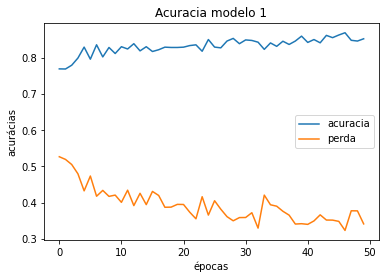

In [28]:
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# saved_model = load_model('outputs/modelo/modelo.h5')
# saved_history = joblib.load("modelo.sav")
# print(saved_history)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Acuracia modelo 1')
plt.xlabel('épocas')
plt.ylabel('acurácias')
plt.legend(['acuracia','perda'])